<a href="https://colab.research.google.com/github/bharaniakella/Deep_work/blob/main/DataLoader_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [6]:
from torch.utils.data import TensorDataset

In [7]:
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


# convert from pandas dataframe to tensor
irisdata = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
irislabels = torch.zeros(len(irisdata), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
irislabels[iris.species=='versicolor'] = 1
irislabels[iris.species=='virginica'] = 2

In [8]:
# create our fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [9]:
fake_dataLoad=DataLoader(fakedata,shuffle=True,batch_size=2)
print(fake_dataLoad)

In [10]:
fake_dataLoad.batch_size

2

In [11]:
for i,data in enumerate(fake_dataLoad):
  print(i,data)

0 tensor([[41, 42, 43, 44],
        [21, 22, 23, 24]])
1 tensor([[81, 82, 83, 84],
        [51, 52, 53, 54]])
2 tensor([[101, 102, 103, 104],
        [ 31,  32,  33,  34]])
3 tensor([[71, 72, 73, 74],
        [91, 92, 93, 94]])
4 tensor([[11, 12, 13, 14],
        [61, 62, 63, 64]])


In [12]:
fd_ten=torch.tensor(fakedata)
fl_ten=torch.tensor(fakelabels)

In [13]:
tdf=TensorDataset(fd_ten,fl_ten)
tdf

In [14]:
for dat,lab in tdf:
  print(dat,lab)

tensor([11, 12, 13, 14]) tensor(False)
tensor([21, 22, 23, 24]) tensor(False)
tensor([31, 32, 33, 34]) tensor(False)
tensor([41, 42, 43, 44]) tensor(False)
tensor([51, 52, 53, 54]) tensor(False)
tensor([61, 62, 63, 64]) tensor(True)
tensor([71, 72, 73, 74]) tensor(True)
tensor([81, 82, 83, 84]) tensor(True)
tensor([91, 92, 93, 94]) tensor(True)
tensor([101, 102, 103, 104]) tensor(True)


In [15]:
dlf=DataLoader(tdf,shuffle=True,batch_size=2)

In [16]:
for dat, lab in dlf:
  print(dat,lab)

tensor([[91, 92, 93, 94],
        [41, 42, 43, 44]]) tensor([ True, False])
tensor([[21, 22, 23, 24],
        [71, 72, 73, 74]]) tensor([False,  True])
tensor([[51, 52, 53, 54],
        [31, 32, 33, 34]]) tensor([False, False])
tensor([[ 61,  62,  63,  64],
        [101, 102, 103, 104]]) tensor([True, True])
tensor([[11, 12, 13, 14],
        [81, 82, 83, 84]]) tensor([False,  True])


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data,test_data,train_labels,test_labels=train_test_split(fakedata,fakelabels,test_size=0.2)


In [19]:
train_data=TensorDataset(torch.tensor(train_data),torch.tensor(train_labels))
test_data=TensorDataset(torch.tensor(test_data),torch.tensor(test_labels))

In [20]:
train_dl=DataLoader(train_data,shuffle=True,batch_size=2)

In [21]:
for dat,lab in train_dl:
  print(dat,lab)

tensor([[81, 82, 83, 84],
        [11, 12, 13, 14]]) tensor([ True, False])
tensor([[41, 42, 43, 44],
        [21, 22, 23, 24]]) tensor([False, False])
tensor([[61, 62, 63, 64],
        [51, 52, 53, 54]]) tensor([ True, False])
tensor([[31, 32, 33, 34],
        [71, 72, 73, 74]]) tensor([False,  True])


In [22]:
#Heading to Iris dataset

In [23]:
train_data,test_data,train_labels,test_labels=train_test_split(irisdata,irislabels,test_size=0.2)

In [24]:
train_data=TensorDataset(train_data,train_labels)
test_data=TensorDataset(test_data,test_labels)

In [25]:
test_data.tensors[0].shape[0]

30

In [26]:
train_dl=DataLoader(train_data,shuffle=True,batch_size=12)
test_dl=DataLoader(test_data,shuffle=True,batch_size=test_data.tensors[0].shape[0])

In [27]:
def create_model():
  ann_dl=nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
  )

  lr=0.05
  loss_fun=nn.CrossEntropyLoss()
  optimizer=torch.optim.SGD(ann_dl.parameters(),lr=lr)
  return ann_dl,loss_fun,optimizer

In [32]:
num_epochs=1000
def train_model():
  train_acc=[]
  test_acc=[]
  for epochi in range(num_epochs):


    batch_acc=[]
    for dat,lab in train_dl:

      yhat=ann_dl(dat)
      loss=loss_fun(yhat,lab)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batch_acc.append(100*torch.mean((torch.argmax(yhat,axis=1)==lab).float()).item())

    train_acc.append(np.mean(batch_acc))

    x,y=next(iter(test_dl))
    pred=ann_dl(x)
    loss=loss_fun(pred,y)
    test_acc.append(100*torch.mean((torch.argmax(pred,axis=1)==y).float()).item())

  return train_acc, test_acc


In [33]:
ann_dl,loss_fun,optimizer=create_model()
train_acc, test_acc=train_model()

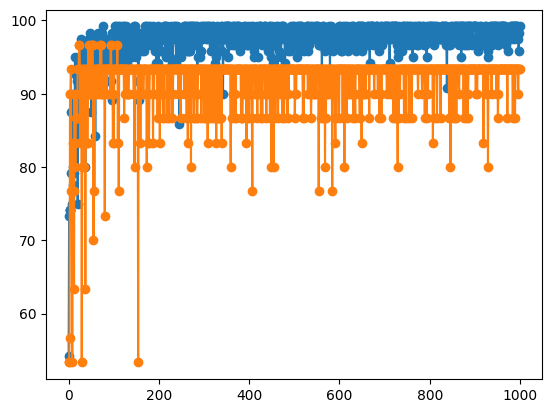

In [34]:
from matplotlib import pyplot as plt
plt.plot(train_acc,'o-')
plt.plot(test_acc,'o-')
plt.show()